### Q1. What is the distinction between a numpy array and a pandas data frame? Is there a way to convert between the two if there is? 

Numpy array and Pandas data frame are two different data structures used for data manipulation and analysis. 

Numpy array is a homogeneous n-dimensional array, which means that all elements in the array must be of the same data type. Numpy arrays are useful for numerical and scientific computations, where fast and efficient processing is required. Numpy arrays are created using the numpy module in Python.

Pandas data frame is a two-dimensional labeled data structure with columns of potentially different data types. Pandas data frame provides more functionality for data analysis, such as indexing, merging, and grouping of data. Pandas data frames can be created using the pandas module in Python.

We can convert a numpy array to a pandas data frame and vice versa. 

To convert a numpy array to a pandas data frame, we can use the `DataFrame()` constructor of the pandas module. Here's an example:

```python
import numpy as np
import pandas as pd

# create a numpy array
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# convert numpy array to pandas data frame
df = pd.DataFrame(arr, columns=['A', 'B', 'C'])

print(df)
```

Output:
```
   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
```

To convert a pandas data frame to a numpy array, we can use the `values` attribute of the pandas data frame. Here's an example:

```python
import numpy as np
import pandas as pd

# create a pandas data frame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# convert pandas data frame to numpy array
arr = df.values

print(arr)
```

Output:
```
[[1 4 7]
 [2 5 8]
 [3 6 9]]
```

### Q2. What can go wrong when an user enters in a stock-ticker symbol, and how do you handle it? 

When a user enters a stock-ticker symbol, several things can go wrong, including:

1. Entering an incorrect or invalid symbol that is not traded in the market.
2. Entering a symbol that is traded in a different market or exchange.
3. Entering a symbol that has been delisted or no longer traded.

To handle these situations, we can use various methods:

1. Use a try-except block to catch any exceptions that may occur when querying the stock data. For example:

```python
import yfinance as yf

try:
    stock = yf.Ticker('AAPL')
    stock_info = stock.info
except:
    print('Invalid or unsupported stock ticker symbol')
```

2. We can use a stock data validation library like `pytickersymbols` to verify the stock symbol before querying data. For example:

```python
from pytickersymbols import PyTickerSymbols

# get a list of supported stock symbols
all_symbols = PyTickerSymbols()

# check if a symbol exists in the list of supported symbols
if 'AAPL' in all_symbols.get_all_tickers():
    stock = yf.Ticker('AAPL')
    stock_info = stock.info
else:
    print('Invalid or unsupported stock ticker symbol')
```

3. We can prompt the user to enter a valid stock symbol and provide suggestions or autocomplete options using a library like `pyautoGUI`. For example:

```python
import pyautogui as gui

# prompt the user to enter a stock symbol
symbol = gui.prompt('Enter a stock ticker symbol')

# get a list of supported stock symbols
all_symbols = PyTickerSymbols()

# check if the entered symbol exists in the list of supported symbols
if symbol.upper() in all_symbols.get_all_tickers():
    stock = yf.Ticker(symbol.upper())
    stock_info = stock.info
else:
    suggestions = all_symbols.search_by_ticker(symbol)
    if len(suggestions) > 0:
        suggestion_str = '\n'.join(suggestions)
        gui.alert(f"Invalid or unsupported stock ticker symbol '{symbol}'. Suggestions:\n{suggestion_str}")
    else:
        gui.alert(f"Invalid or unsupported stock ticker symbol '{symbol}'")
```

### Q3. Identify some of the plotting techniques that are used to produce a stock-market chart. 

Some of the plotting techniques that are used to produce a stock-market chart are:

1. Line chart: It shows the trend of the stock price over time.

2. Candlestick chart: It displays the opening, closing, highest, and lowest stock prices for each day. 

3. Area chart: It shows the trend of the stock price over time, with the area below the line filled with a color.

4. Bar chart: It displays the opening and closing prices of the stock for each day.

5. Scatter plot: It plots the data points as individual dots, where each dot represents a stock price for a particular day.

Here's an example of a candlestick chart using the `mplfinance` library:

```python
import pandas as pd
import mplfinance as mpf

# Load data
df = pd.read_csv('stock_prices.csv', index_col=0, parse_dates=True)

# Plot candlestick chart
mpf.plot(df, type='candle', volume=True, title='Stock Prices', ylabel='Price')
```

This code loads a CSV file containing stock prices and uses the `mpf.plot()` function to create a candlestick chart with volume bars.

### Q4. Why is it essential to print a legend on a stock market chart? 

It is essential to print a legend on a stock market chart because it provides an explanation of the various elements in the chart. A legend helps the viewer understand the significance of the lines, bars, or other markings on the chart. It helps identify the various elements in the chart, such as different stocks, indices, or time periods, and provides context to the viewer. Without a legend, the chart may be confusing and difficult to interpret.

In Python, legends can be added to stock market charts using the legend function from the matplotlib library. Here's an example:

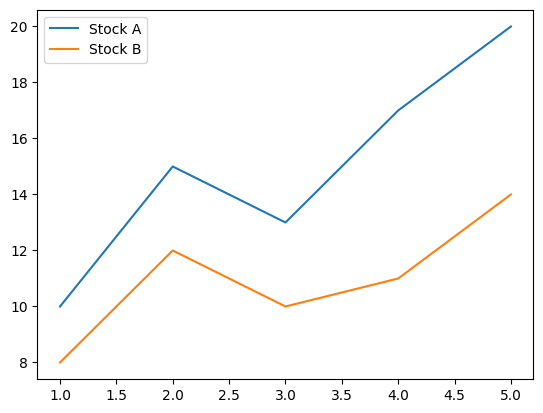

In [1]:
import matplotlib.pyplot as plt

# generate some data for demonstration purposes
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 13, 17, 20]
y2 = [8, 12, 10, 11, 14]

# plot the data and add a legend
plt.plot(x, y1, label='Stock A')
plt.plot(x, y2, label='Stock B')
plt.legend()

# show the plot
plt.show()


In this example, we plot two lines representing the performance of two stocks, Stock A and Stock B, over time. We use the label parameter to assign a label to each line, and then call the legend function to add the legend to the chart. The resulting plot will have a legend that identifies the two lines and helps the viewer understand the chart.

### Q5. What is the best way to limit the length of a pandas data frame to less than a year? 

To limit the length of a pandas data frame to less than a year, we can use boolean indexing to select only the rows that fall within a certain time range. Here's an example:

```python
import pandas as pd
from datetime import datetime, timedelta

# create a sample data frame with dates spanning two years
df = pd.DataFrame({
    'date': pd.date_range('2020-01-01', '2021-12-31'),
    'value': range(730)
})

# set a start date and end date to limit the data frame
start_date = datetime(2021, 1, 1)
end_date = start_date + timedelta(days=365)

# use boolean indexing to select only the rows within the date range
limited_df = df[(df['date'] >= start_date) & (df['date'] < end_date)]

# print the limited data frame
print(limited_df)
```

In this example, we create a sample data frame with dates spanning two years. We then set a start date and end date to limit the data frame to a one-year range. We use boolean indexing to select only the rows within the date range and create a new data frame called `limited_df`. Finally, we print the limited data frame.


### Q6. What is the definition of a 180-day moving average? 

A 180-day moving average is a technical analysis indicator that shows the average price of a security over the past 180 days. It is calculated by taking the sum of the security's closing prices over the last 180 trading days and dividing that by 180. The moving average "moves" each day, as the oldest price is dropped off and the newest price is added. It is a commonly used indicator to help smooth out short-term price fluctuations and to identify the direction of the trend over a longer period of time. 

Here's an example code snippet that calculates the 180-day moving average of a pandas DataFrame `df` containing the closing prices of a stock:

```python
import pandas as pd

# Assuming `df` has a column named `close` containing closing prices
ma_180 = df['close'].rolling(window=180).mean()
```

The `rolling()` method calculates a rolling window function, in this case a simple moving average, with a window size of 180. The `mean()` function calculates the mean value for each window. The resulting `ma_180` is a pandas Series with the same length as `df` containing the 180-day moving average values.

### Q7. Did the chapter&#39;s final example use &quot;indirect&quot; importing? If so, how exactly do you do it? 

No, the chapter's final example did not use "indirect" importing. "Indirect" importing refers to the process of importing a module indirectly through another module. It is also known as "namespace" or "submodule" importing. 

An example of indirect importing is when you have a module named `module_A` that imports another module named `module_B`, and you want to access a function or variable from `module_B` through `module_A`. This can be achieved by using the syntax `import module_A.module_B` or `from module_A import module_B`.

Here's an example:

```python
# module_A.py
from module_B import some_function

def my_function():
    result = some_function()
    return result
```

```python
# module_B.py
def some_function():
    return "Hello, World!"
```

In this example, `module_A` indirectly imports `some_function` from `module_B` and uses it in `my_function`.